In [67]:
#Import the necessary libraries, Modules and classifiers
import numpy as np  #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd  #Package is providing fast, flexible, and expressive data structures 
#designed to make working with “relational” or “labeled” data both easy and intuitive.

import matplotlib.pyplot as plt #Python 2D plotting library 
#commands in cells below the cell that outputs a plot will not affect the plot with: 
%matplotlib inline
#(Commenting on the same line causes an error)
import seaborn as sns  #visualization library based on matplotlib, for statistical data visualization

from sklearn.linear_model import LinearRegression #module for Ordinary least squares Linear Regression.
from sklearn import linear_model #Module for applying  the linear model using coefficients 
#w = (w_1, ..., w_p) to minimize the residual sum of squares between the observed responses in the dataset.
from sklearn.model_selection import train_test_split #module for splitting data in train and test set
from sklearn.model_selection import cross_val_score  #module for calculating the cross-validation-score

#We read the data from a csv-file (ensure that the  values are separated by commas otherwise you need to 
#specify the delimiter explicitly within the following load-statement):
hr_data=pd.read_csv('.\HR_comma_sep.csv',header=0) #mention the line with the headline, be aware: counting from
#the first entry in Python starts from '0'

hr_data.head() #showing the first five entries; attribute in brackets will give the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [68]:
hr_data.info() #attribut specifications; shows the datatype-information about the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [69]:
hr_data.rename(columns={'sales':'department'}, inplace=True) #Renaming Columns, note: You do need 
#to specify the existing label first followed by the new label to rename it to afterward! 
hr_data_new = pd.get_dummies(hr_data, ['department', 'salary'] ,drop_first = True) #Whether to get k-1 dummies 
#out of k categorical levels by removing the first level. New in Pandas version 0.18.0.
hr_data_new.head()  #show the first five entries, attribute in brackets will give the # of printed lines 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [71]:
from sklearn.model_selection import train_test_split #utility function to split the data into a development 
#set usable for fitting a GridSearchCV instance and an evaluation set for its final evaluation

#separate X (feature-variables) and Y (target-variable)
X = hr_data_new.drop('satisfaction_level', axis=1) #Drop the target-variable from the features  
y = hr_data_new['satisfaction_level']  #set it to y


#split the data set into train and test set; proportion of test size = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
#using the same random_state (fixed seed ) will always produce the same result

In [72]:
print  (X_train.shape) #returns the dimensions of the array X_train
print  (X_test.shape) #"-" X_test
print  (y_train.shape) #"-" y_train
print  (y_test.shape) #"-" y_test

(8999, 18)
(6000, 18)
(8999,)
(6000,)


In [73]:
###linear regression###

In [74]:
list(X) #list the available features

['last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium']

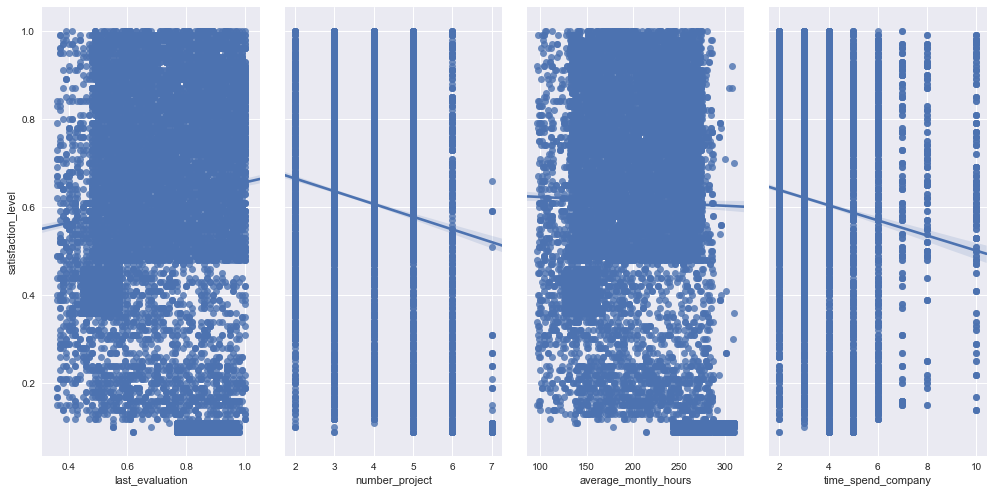

In [75]:
#Plot pairwise relationships in a dataset or draw multiple instances of the same plot on different subsets of the dataset
sns.pairplot(hr_data,x_vars=['last_evaluation', 'number_project','average_montly_hours', 'time_spend_company'],
             y_vars='satisfaction_level', size=7,aspect=0.5,kind='reg'); #first argument of the pairplot is the datasource,
    #followed by a selection of featurs that should be observed, next parameters set the height and width of the diagrams;
    #the kind-parameter fits a linear regression model to the scatter plots

In [76]:
#load the packages for using a linear regression model
from sklearn import linear_model
from sklearn import metrics #for calculating metrics

# instantiate the model
lr = linear_model.LinearRegression(normalize=True, )#regressors are normalized, note that this 
#makes the hyperparameters learnt more robust and almost independent from the number of samples

#fit the model to the data
linreg=lr.fit(X_train,y_train)

In [77]:
#we are checking the size of of the splitted set  
print  (X_train.shape)
print  (X_test.shape)
print  (y_train.shape)
print  (y_test.shape)

(8999, 18)
(6000, 18)
(8999,)
(6000,)


In [78]:
#print the intercept and coefficients of the model
print(linreg.intercept_)
print(lr.coef_)

0.603006604244
[  2.40488885e-01  -4.19349435e-02   2.23314592e-04  -3.55012078e-03
  -3.29774824e-03  -2.24427105e-01  -1.61977561e-03   1.97703203e-03
  -4.04893601e-03  -1.79199167e-03   6.54732231e-03   5.34061424e-03
   2.29679723e-02   1.95770980e-02   1.31102326e-02   1.08053865e-02
   7.45889609e-03   1.05707860e-02]


In [79]:
#Calculate Prediction on the test-set 
linreg_score_train = linreg.score(X_train, y_train) #Returns the coefficient of determination R² 
print("Training score: ",linreg_score_train)
linreg_score_test = linreg.score(X_test, y_test)
print("Testing score: ",linreg_score_test)

Training score:  0.199463935713
Testing score:  0.195934885324


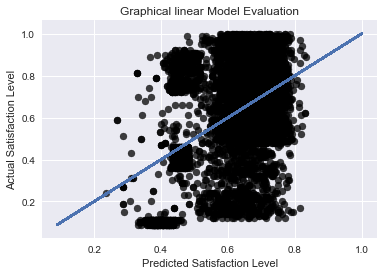

In [80]:
#plot predicted vs. test values - shows the quality of the model visually
y_pred = lr.predict(X_test) #Predict labels based on the testing features

plt.title('Graphical linear Model Evaluation') #printing the titel of the plot
plt.xlabel('Predicted Satisfaction Level') #naming the x-axis of the plot
plt.ylabel('Actual Satisfaction Level') #naming the y-axis  of the plot

actual_values = y_test
plt.scatter(y_pred, actual_values,alpha=.75, color='black')  #plots the predicted values
#against the testing values
plt.plot(y_test,y_test,linewidth=2.0) #draws a lineplot symbolizing the angle bisectrix 

plt.show()

In [81]:
##regression metrics

#Mean Absolute Error 
from sklearn.metrics import mean_absolute_error

ae=mean_absolute_error(y_test, y_pred) #calculating the the Mean Absolute Error between train- and test-set
print ('absolute error is: \n', ae)

#Mean squared Error, Compared to Mean Absolute Error, RMSE amplifies and severely punishes large errors
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred)**0.5)

absolute error is: 
 0.181406867267
RMSE is: 
 0.224484906086


In [82]:
###logistic regreession### 

In [83]:
from sklearn.linear_model import LogisticRegression #import the model for Logistic regression

In [84]:
# We use model_selection and import the method to split the data randomly
from sklearn.model_selection import train_test_split

# Initialize logistic regression model
logis=LogisticRegression(random_state=42)


#drop the target variable from the available features; separate X and Y
X = hr_data_new.drop('left', axis=1)
y = hr_data_new['left']


#split the dataset into training and test set, 40% for test set, random seed for comparable results, 
#target parameter <y> is stratified 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1, stratify=y)
#stratify parameter makes a split so that the proportion of values in the sample produced will be the same 
#as the proportion of values provided to parameter stratify

In [85]:
logis.fit(X_train, y_train) #train the model with the logistic Regression Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
#calculate the training and Testing score
logis_score_train = logis.score(X_train,y_train)
print("Training score: ", logis_score_train)
logis_score_test = logis.score(X_test,y_test)
print("Testing score: ", logis_score_test)

Training score:  0.789865540616
Testing score:  0.790333333333


In [87]:
# Check trained model intercept
print(logis.intercept_)
# Check trained model coefficients
print(logis.coef_)

[-1.41745604]
[[-3.9971641   0.52737708 -0.28289263  0.00445968  0.2447133  -1.45177132
  -1.1110018  -0.45937059  0.25358684  0.52305049 -0.26890189  0.14724844
   0.00772486  0.1266692   0.25509556  0.24205223  1.72230381  1.14722869]]


Area Under the Curve: 0.819982980069


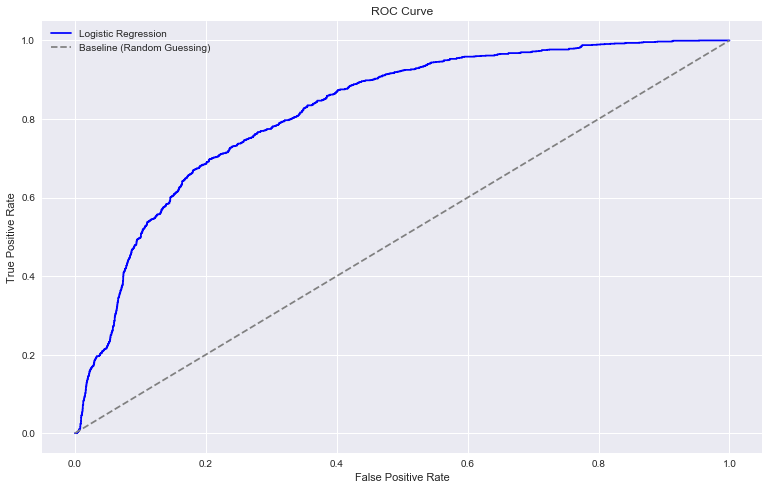

In [88]:
#we use ROC curve for visualization of the true positive rate (TPR) against the false positive rate (FPR)
from sklearn.metrics import roc_curve, roc_auc_score #import the modules for the curve and metrics
probabilities = logis.predict_proba(X_test) #To be able to plot the curve, probability estimates are used
#and we calculate them with our logistic regression classifier
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1]) #curve is calculated for the entries in 
#y_test against their calculated prediction with logistic regression classifier
#the roc curve functionality returns fpr, tpr, thresholds; for further information see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr}) #the returned values 
#are saved in a dataframe

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='b', label='Logistic Regression')
rocax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)') # plot the angle bisectrix 
rocax.set_xlabel('False Positive Rate') #labeling x-axis
rocax.set_ylabel('True Positive Rate')  #labeling y-axis
rocax.set_title('ROC Curve')  #labeling the diagram itself
rocax.legend() # showing the legend

print('Area Under the Curve:', roc_auc_score(y_test, probabilities[:,1])) 
#calculating and printing AUC = Area Under the Curve 